## Import Necessaries

In [3]:
import json
import pandas as pd
import numpy as np
import shutil
import os
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

import tensorflow as tf

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from glob import glob
from PIL import Image
import pickle

from tqdm import tqdm
import collections
import random

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image


In [4]:
'''
#Read json file
with open('/home/shankar/Desktop/YELP/Food/IPYNB/preproccaption.json') as data_file:
    data=json.load(data_file)
#Convert to DataFrame
df=DataFrame(data['photojson'])
'''
df_caption=pd.read_csv('captioneddata_final.csv') #before
#df_caption=pd.read_json('/home/shankar/Desktop/YELP/Food/IPYNB/newcorrectedcaption.json')

df_caption=df_caption.loc[df_caption['label']=='food']

In [5]:
df_caption

,Unnamed: 0,photo_id,business_id,caption,label,number_of_words,cleaned_caption
2,3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,2,shrimp scampi
5,12,Le9rMdT8YFlvqr431LctIQ,BELS5YkYjDFkpbM2FuDdaA,Fried Chick'un Sandwich,food,3,fried sandwich
6,13,9kVdBkGWcKfCFzSwUXjQyw,iryqT-RFwl7erA4MDAuLyg,The Korrito! Korean BBQ sushi made burrito size!,food,8,korrito korean bbq sushi burrito size
8,18,e0dD0np3hY3F8LoUtrNoPw,jTFl9Cr7RqZqwjH-CI1ZPw,These cream filled donuts can't be beat! Crea...,food,13,cream fill donut beat cream bite guarantee
9,19,xiyqMEgTl4B4ux047E_zqw,Ghn6flCdNlOchzLA29tkjQ,Piedmont Salad--serious yum factor,food,4,piedmont salad yum factor
...,...,...,...,...,...,...,...
95654,200068,4cI_ZGkzyZnpTlwenTrpFA,wIz_tZ88bj4W3VlrJTiiqQ,Pork belly,food,2,pork belly
95657,200077,TPiBKvLj7WCkk4aR-GGA5g,EYs_T4NU2BbaUF7vUDI55Q,Beauty queen,food,2,beauty queen
95662,200088,hLrcPCLQ8on6VzxIJZdBoQ,9_V0SWbQPnZ0mR3kljXqBQ,The boat always looks so elegant,food,6,boat look elegant
95665,200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food,2,limoncello cake


In [6]:

#caption and nocaption
df_caption = df_caption[df_caption['photo_id']!="LXT4hCf1lRyUeM4HDBaSvg"]
df_caption



,Unnamed: 0,photo_id,business_id,caption,label,number_of_words,cleaned_caption
2,3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food,2,shrimp scampi
5,12,Le9rMdT8YFlvqr431LctIQ,BELS5YkYjDFkpbM2FuDdaA,Fried Chick'un Sandwich,food,3,fried sandwich
6,13,9kVdBkGWcKfCFzSwUXjQyw,iryqT-RFwl7erA4MDAuLyg,The Korrito! Korean BBQ sushi made burrito size!,food,8,korrito korean bbq sushi burrito size
8,18,e0dD0np3hY3F8LoUtrNoPw,jTFl9Cr7RqZqwjH-CI1ZPw,These cream filled donuts can't be beat! Crea...,food,13,cream fill donut beat cream bite guarantee
9,19,xiyqMEgTl4B4ux047E_zqw,Ghn6flCdNlOchzLA29tkjQ,Piedmont Salad--serious yum factor,food,4,piedmont salad yum factor
...,...,...,...,...,...,...,...
95654,200068,4cI_ZGkzyZnpTlwenTrpFA,wIz_tZ88bj4W3VlrJTiiqQ,Pork belly,food,2,pork belly
95657,200077,TPiBKvLj7WCkk4aR-GGA5g,EYs_T4NU2BbaUF7vUDI55Q,Beauty queen,food,2,beauty queen
95662,200088,hLrcPCLQ8on6VzxIJZdBoQ,9_V0SWbQPnZ0mR3kljXqBQ,The boat always looks so elegant,food,6,boat look elegant
95665,200092,n8PcPp6Xyr26KwV06c3XNQ,k1WPGl766RE5t42kD60RyQ,Limoncello cake,food,2,limoncello cake


In [8]:
# Group all captions together having the same image ID.
image_path_to_caption = collections.defaultdict(list)
for ind in df_caption.index:
    caption = "<start> "+ str(df_caption['cleaned_caption'][ind])+" <end> " #before
    #caption = "<start> "+ df_caption['newcaption'][ind]+" <end> " #after
    image_path ='D:/Image-Caption-Generator/foodphotos/' + (df_caption['photo_id'][ind])+'.jpg'
    image_path_to_caption[image_path].append(caption)

In [9]:
image_paths = list(image_path_to_caption.keys())
random.shuffle(image_paths)
# All captioned images for training
train_image_paths = image_paths
print(len(train_image_paths))
print(train_image_paths[0])

54524
D:/Image-Caption-Generator/foodphotos/__o28Qaz35EBsJN2q8q54Q.jpg


In [10]:
train_captions = []
img_name_vector = []
for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

<start> popcorn banh mi <end> 


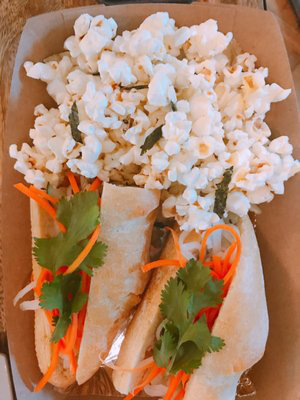

In [11]:
print(train_captions[1])
Image.open(img_name_vector[1])

### Preprocess the images using InceptionV3

In [12]:
#Preprocess the images using InceptionV3
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

### Initialize InceptionV3 and load the pretrained Imagenet weights

In [13]:
#Initialize InceptionV3 and load the pretrained Imagenet weights
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

#Caching the features extracted from InceptionV3
encode_train = sorted(set(img_name_vector))
print((encode_train[19120:19136]))

image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)

image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)


for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))

    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        if(path_of_feature.split('/')[3].split('.')[1]=='jpg'):
            np.save("numpyfood1/"+path_of_feature.split('/')[3], bf.numpy())

In [17]:
#Preprocess and tokenize the captions

# Find the maximum length of any caption in our dataset
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

In [18]:
# Choose the top 5000 words from the vocabulary
top_k = 6000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(train_captions)
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [19]:
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [20]:
# Create the tokenized vectors
train_seqs = tokenizer.texts_to_sequences(train_captions)

In [21]:
# Pad each vector to the max_length of the captions
# If you do not provide a max_length value, pad_sequences calculates it automatically
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [22]:
# Calculates the max_length, which is used to store the attention weights
max_length = calc_max_length(train_seqs)

### Split the data into training and testing

In [23]:
img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

# Create training and validation sets using an 80-20 split randomly.
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

In [24]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(43619, 43619, 10905, 10905)

In [25]:
#Create a tf.data dataset for training

In [26]:
# Feel free to change these parameters according to your system's configuration

BATCH_SIZE = 64
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE
# Shape of the vector extracted from InceptionV3 is (64, 2048)
# These two variables represent that vector shape
features_shape = 2048
attention_features_shape = 64

In [27]:
# Load the numpy files
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

In [28]:
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

### Model

In [29]:
class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

        # hidden shape == (batch_size, hidden_size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                         self.W2(hidden_with_time_axis)))

        # score shape == (batch_size, 64, 1)
        # This gives you an unnormalized score for each image feature.
        score = self.V(attention_hidden_layer)

        # attention_weights shape == (batch_size, 64, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

### CNN Image Encoder

In [30]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it using pickle
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

### RNN Text Decoder

In [31]:
class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

        # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

        # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [32]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

### Loss and Optimization

In [33]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [34]:
#Checkpoint

In [35]:
checkpoint_path = "./checkpoints/finaltrain"
#checkpoint_path = "./checkpoints/beforetrain"
#checkpoint_path = "./checkpoints/aftertrain"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [36]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # restoring the latest checkpoint in checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

### Training

In [37]:
# # adding this in a separate cell because if you run the training cell
# many times, the loss_plot array will be reset
# loss_plot = []

In [38]:
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

In [39]:
import time
EPOCHS = 50

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
        ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 1.7732
Epoch 1 Batch 100 Loss 1.3488
Epoch 1 Batch 200 Loss 1.0910
Epoch 1 Batch 300 Loss 1.3103
Epoch 1 Batch 400 Loss 0.9587
Epoch 1 Batch 500 Loss 1.2359
Epoch 1 Batch 600 Loss 1.0661
Epoch 1 Loss 1.217966
Time taken for 1 epoch 2102.5380177497864 sec

Epoch 2 Batch 0 Loss 1.0728
Epoch 2 Batch 100 Loss 1.2377
Epoch 2 Batch 200 Loss 1.0888
Epoch 2 Batch 300 Loss 1.1754
Epoch 2 Batch 400 Loss 0.9443
Epoch 2 Batch 500 Loss 1.1183
Epoch 2 Batch 600 Loss 0.9277
Epoch 2 Loss 1.041311
Time taken for 1 epoch 1873.4373552799225 sec

Epoch 3 Batch 0 Loss 1.2009
Epoch 3 Batch 100 Loss 0.9818
Epoch 3 Batch 200 Loss 0.9426
Epoch 3 Batch 300 Loss 0.9543
Epoch 3 Batch 400 Loss 0.8416
Epoch 3 Batch 500 Loss 0.8449
Epoch 3 Batch 600 Loss 1.0146
Epoch 3 Loss 0.946576
Time taken for 1 epoch 1818.6352229118347 sec

Epoch 4 Batch 0 Loss 0.9521
Epoch 4 Batch 100 Loss 0.7825
Epoch 4 Batch 200 Loss 0.9035
Epoch 4 Batch 300 Loss 0.8054
Epoch 4 Batch 400 Loss 0.8841
Epoch 4 Batch 500 Los

KeyboardInterrupt: 

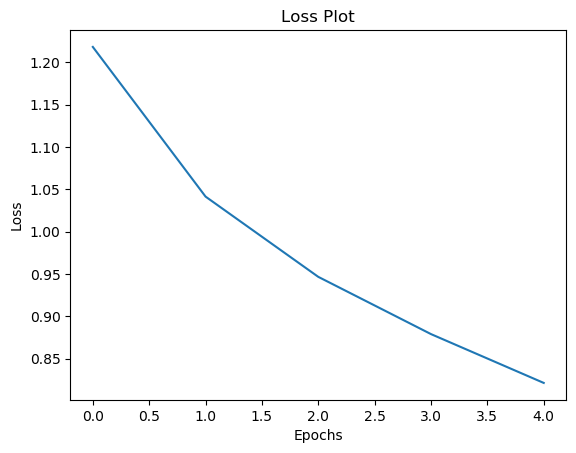

In [40]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [41]:
#Caption!

In [47]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))
    print(max_length)
    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

In [48]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(10, 10))

    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))
        ax = fig.add_subplot(len_result//2, len_result//2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

# Use trained Multi Label Classifier to Predict Label

In [ ]:
# Multi label classifier
# model = keras.models.load_model("/home/shankar/Desktop/YELP/Food/Multi/2ffocat/modelsorg/inceptionv3_multiclass_best.h5")

In [ ]:
# dft = pd.read_json(r'ffocatlabels.json')
# label=dft['FoodName']
# classes = np.array(label)

# Evaluation on randomly selected 30 validation images of YELP

In [49]:
# captions on the validation set random
rdf = pd.DataFrame() 

#Lists to create dataframe
r=[]
p=[]
l=[]
pc=[]
gc=[]
for a in range(30):
    rid = np.random.randint(0, len(img_name_val))
    print(img_name_val[rid])
    img = img_name_val[rid]
    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_val[rid] if i not in [0]])
    result, attention_plot = evaluate(img)
    
    r.append(real_caption)
    p.append(img[46:])
    pc.append(' '.join(result))

    print ('\nReal Caption:', real_caption)
    print ('Predicted Caption:', ' '.join(result))



D:/Image-Caption-Generator/foodphotos/CWj2t97fstY8Q2t4K-npNg.jpg
24

Real Caption: <start> know serve hot add iced coffee delicious <end>
Predicted Caption: beignet need people <end>
D:/Image-Caption-Generator/foodphotos/SJYEhtvpjVn2W8PLzTpNtQ.jpg
24

Real Caption: <start> <unk> ranchero <end>
Predicted Caption: veggie chicken chicken teriyaki sauce pork chopped downtown <end>
D:/Image-Caption-Generator/foodphotos/2IRKhhmbkKriPHPtmMQZIg.jpg
24

Real Caption: <start> boston market carver sandwich <end>
Predicted Caption: cheeseteak <end>
D:/Image-Caption-Generator/foodphotos/lWBwggOP-Ei1rY5gQymXrw.jpg
24

Real Caption: <start> manicotti <end>
Predicted Caption: chive debris hash brown rice chips <end>
D:/Image-Caption-Generator/foodphotos/p7RXExOnqwP3QbZqnoDijQ.jpg
24

Real Caption: <start> chicken liver toast <end>
Predicted Caption: burrito bowl <end>
D:/Image-Caption-Generator/foodphotos/bglAEKTPgSqi6y4RKsThwg.jpg
24

Real Caption: <start> delicious healthy hummus plate level grand p